<a href="https://colab.research.google.com/github/AngieDuran953/Prueba-t-cnica-/blob/main/Prueba_tecnica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Importar las librerias necesarias

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [ ]:
# Se leen los conjuntos de train y test
train_df=pd.read_csv("train.csv", sep=';')
test_df=pd.read_csv("test.csv", sep=';')

#### Análisis exploratorio de los datos (con el fin de elegir las mejores caracteristicas para el modelo final, el tratamiento de datos faltantes y las variables categóricas)

In [ ]:
# Se revisa la información del conjunto test, para ver cuantos datos tiene, cuantas variables conforman el ds y el tipo de variables.
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30493 entries, 0 to 30492
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   TW                   30493 non-null  object 
 1   BARRIO               30493 non-null  object 
 2   summary              30493 non-null  object 
 3   icon                 30493 non-null  object 
 4   precipIntensity      30493 non-null  float64
 5   precipProbability    30493 non-null  float64
 6   temperature          30493 non-null  float64
 7   apparentTemperature  30493 non-null  float64
 8   dewPoint             30493 non-null  float64
 9   humidity             30493 non-null  float64
 10  windSpeed            30493 non-null  float64
 11  cloudCover           30493 non-null  float64
 12  uvIndex              30493 non-null  float64
 13  visibility           30493 non-null  float64
 14  Accidente            30493 non-null  float64
dtypes: float64(11), object(4)
memory usa

In [ ]:
# Se revisa la información del conjunto train, para ver cuantos datos tiene, cuantas variables conforman el ds y el tipo de variables.
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153401 entries, 0 to 153400
Data columns (total 15 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   TW                   153401 non-null  object 
 1   BARRIO               153401 non-null  object 
 2   summary              122038 non-null  object 
 3   icon                 122038 non-null  object 
 4   precipIntensity      122038 non-null  float64
 5   precipProbability    122038 non-null  float64
 6   temperature          153367 non-null  float64
 7   apparentTemperature  153367 non-null  float64
 8   dewPoint             153384 non-null  float64
 9   humidity             153350 non-null  float64
 10  windSpeed            151525 non-null  float64
 11  cloudCover           153030 non-null  float64
 12  uvIndex              153197 non-null  float64
 13  visibility           153228 non-null  float64
 14  Accidente            153401 non-null  float64
dtypes: float64(11), o

In [ ]:
#Se revisan cuantos datos tiene cada variable numérica, la mediana, los 3 percentiles principales, el valor máximo, mínimo y la desviación estandar
train_df.describe()

,precipIntensity,precipProbability,temperature,apparentTemperature,dewPoint,humidity,windSpeed,cloudCover,uvIndex,visibility,Accidente
count,122038.000000,122038.000000,153367.000000,153367.000000,153384.000000,153350.000000,151525.000000,153030.000000,153197.000000,153228.000000,153401.000000
mean,0.449928,0.174555,19.749037,19.795784,14.153107,0.721484,1.836769,0.700631,1.997089,11.030310,0.017692
std,0.907946,0.236199,3.778424,3.780271,1.903823,0.151734,1.420965,0.206046,2.866448,3.351337,0.131831
min,0.000000,0.000000,9.970000,9.970000,4.100000,0.240000,0.000000,0.000000,0.000000,0.099000,0.000000
25%,0.000000,0.000000,16.770000,16.810000,12.920000,0.620000,0.870000,0.450000,0.000000,9.916000,0.000000
50%,0.045200,0.080000,18.640000,18.740000,14.530000,0.730000,1.500000,0.750000,0.000000,10.003000,0.000000
75%,0.541000,0.280000,22.700000,22.740000,15.630000,0.840000,2.490000,0.850000,4.000000,14.212000,0.000000
max,19.831600,1.000000,31.190000,34.140000,23.080000,1.000000,11.150000,1.000000,12.000000,16.093000,1.000000


In [ ]:
#Se revisan cuantos datos tiene cada variable numérica, la mediana, los 3 percentiles principales, el valor máximo, mínimo y la desviación estandar
test_df.describe()

,precipIntensity,precipProbability,temperature,apparentTemperature,dewPoint,humidity,windSpeed,cloudCover,uvIndex,visibility,Accidente
count,30493.000000,30493.000000,30493.000000,30493.000000,30493.000000,30493.000000,30493.000000,30493.000000,30493.000000,30493.000000,30493.000000
mean,0.459884,0.176664,19.507032,19.551682,14.048778,0.726128,1.654275,0.721481,2.026793,11.440843,0.017643
std,0.942329,0.237954,3.659965,3.657982,1.961380,0.148037,1.178235,0.205573,2.895424,3.526584,0.131654
min,0.000000,0.000000,9.830000,9.830000,4.260000,0.240000,0.000000,0.000000,0.000000,0.399000,0.000000
25%,0.000000,0.000000,16.630000,16.680000,12.670000,0.640000,0.850000,0.550000,0.000000,9.888000,0.000000
50%,0.048900,0.080000,18.400000,18.490000,14.480000,0.730000,1.400000,0.750000,0.000000,10.003000,0.000000
75%,0.550900,0.290000,22.330000,22.360000,15.570000,0.840000,2.230000,0.890000,4.000000,15.177000,0.000000
max,19.521700,1.000000,31.180000,31.180000,22.960000,1.000000,10.680000,1.000000,12.000000,16.093000,1.000000


In [ ]:
#Se realiza un análisis exploratorio de los datos faltantes, como resultado se obtiene que 4 variables tienen mas del 20% de datos faltantes,
#dos de ellas son variables categoricas y dos de ellas son variables numericas
missing_values_train = train_df.isnull().sum()
missing_percentage_train =(missing_values_train / len(train_df))*100
pd.concat([missing_values_train,missing_percentage_train], axis=1, keys =['Missing Values', 'Percentage'])

,Missing Values,Percentage
TW,0,0.000000
BARRIO,0,0.000000
summary,31363,20.445108
icon,31363,20.445108
precipIntensity,31363,20.445108
precipProbability,31363,20.445108
temperature,34,0.022164
apparentTemperature,34,0.022164
dewPoint,17,0.011082
humidity,51,0.033246


In [ ]:
# Se realiza el mismo proceso para el conjutno de test pero no muestra valores faltantes
missing_values_test = test_df.isnull().sum()
missing_percentage_test =(missing_values_test / len(test_df))*100
pd.concat([missing_values_test,missing_percentage_test], axis=1, keys =['Missing Values', 'Percentage'])

,Missing Values,Percentage
TW,0,0.0
BARRIO,0,0.0
summary,0,0.0
icon,0,0.0
precipIntensity,0,0.0
precipProbability,0,0.0
temperature,0,0.0
apparentTemperature,0,0.0
dewPoint,0,0.0
humidity,0,0.0


<ipython-input-10-77f1c8c61f3c>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_df[column], kde=False)


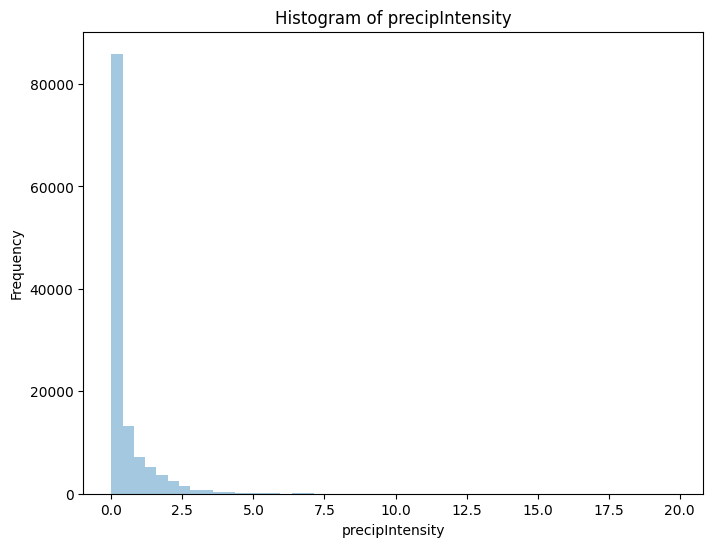

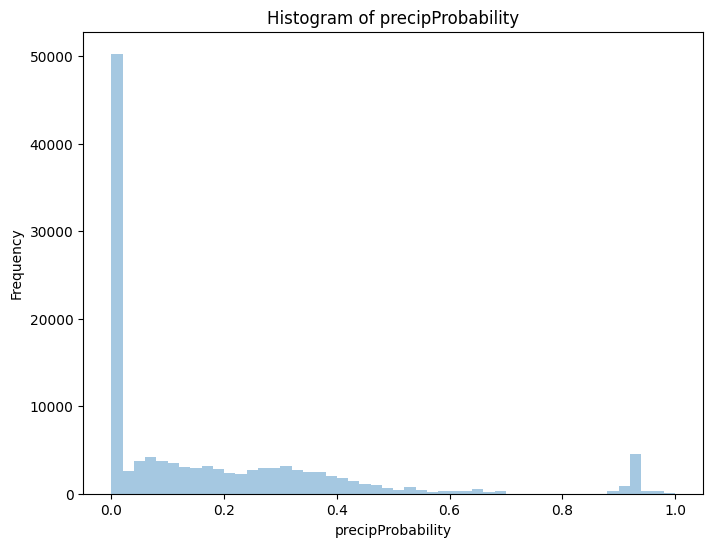

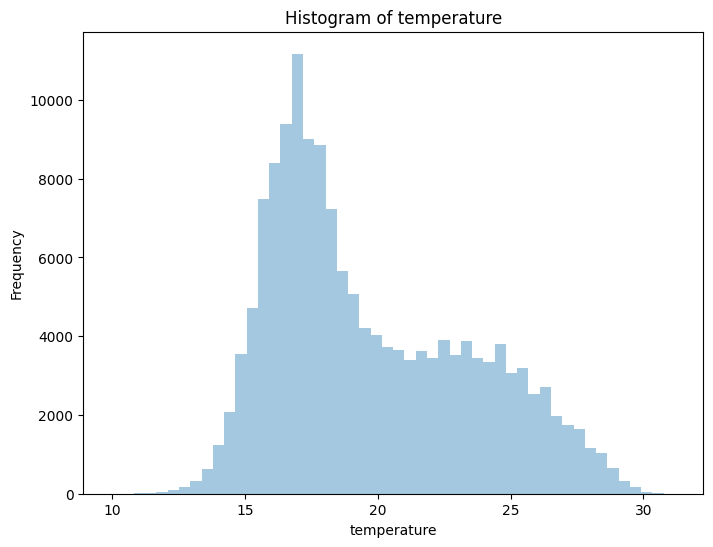

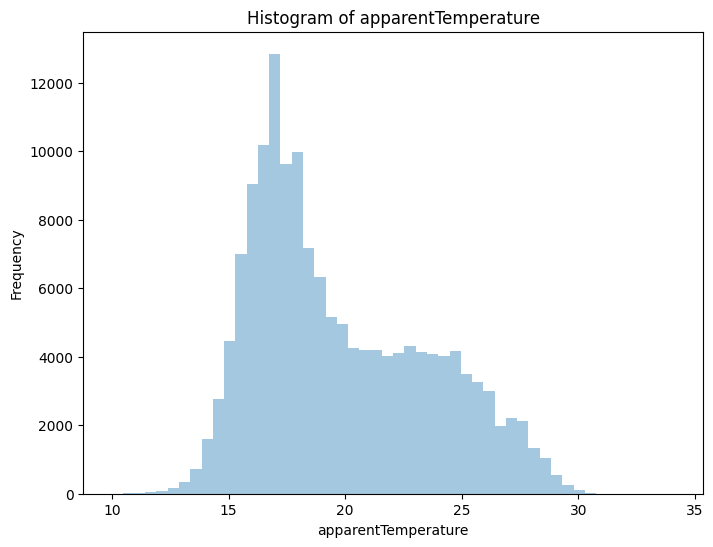

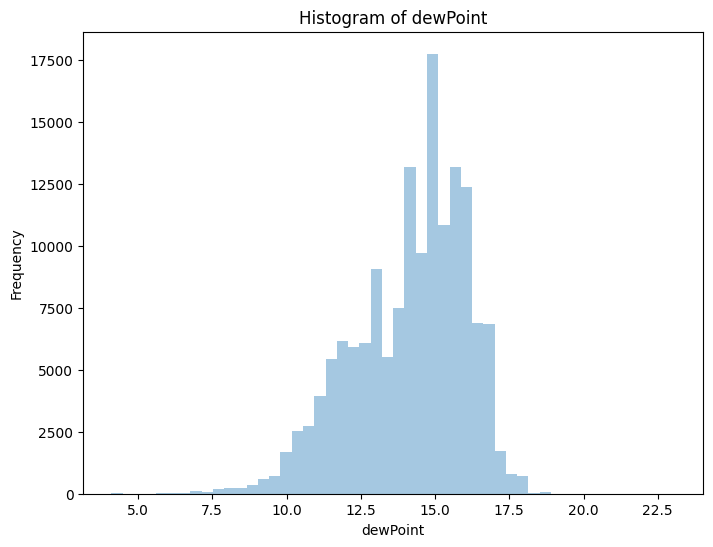

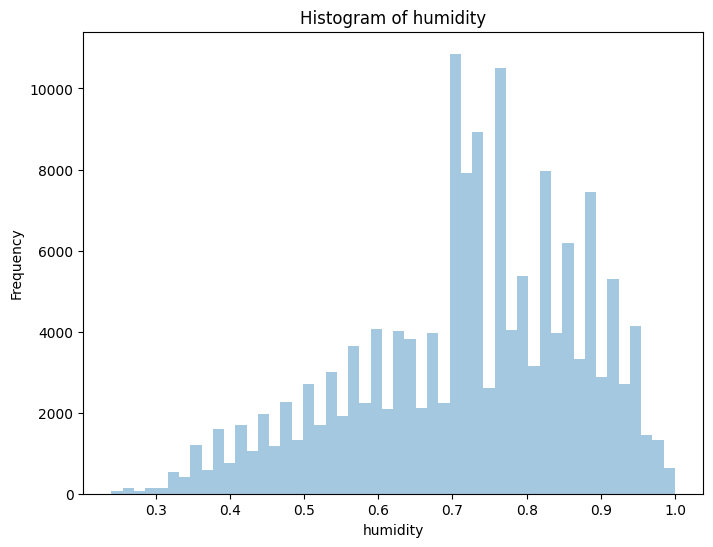

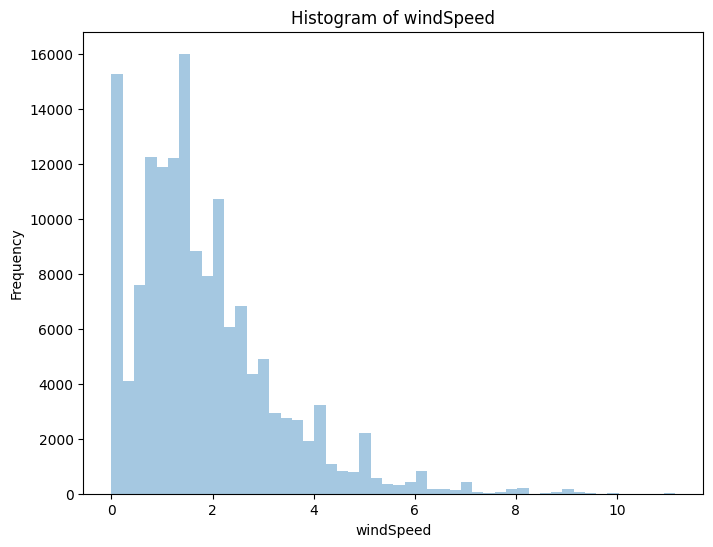

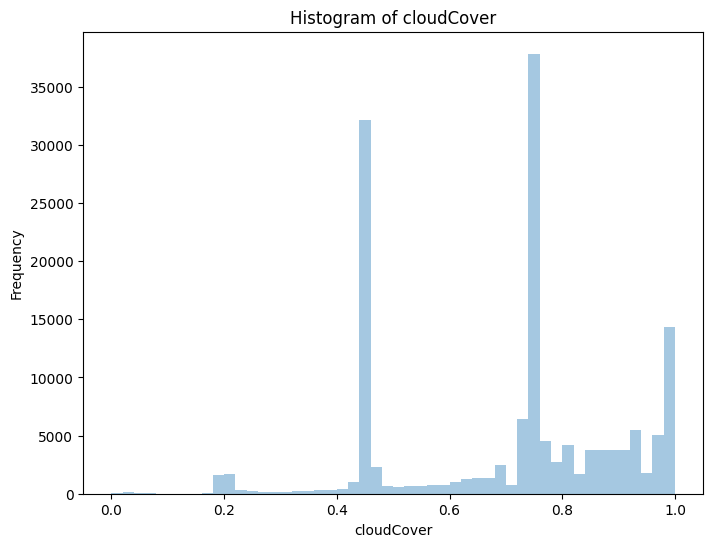

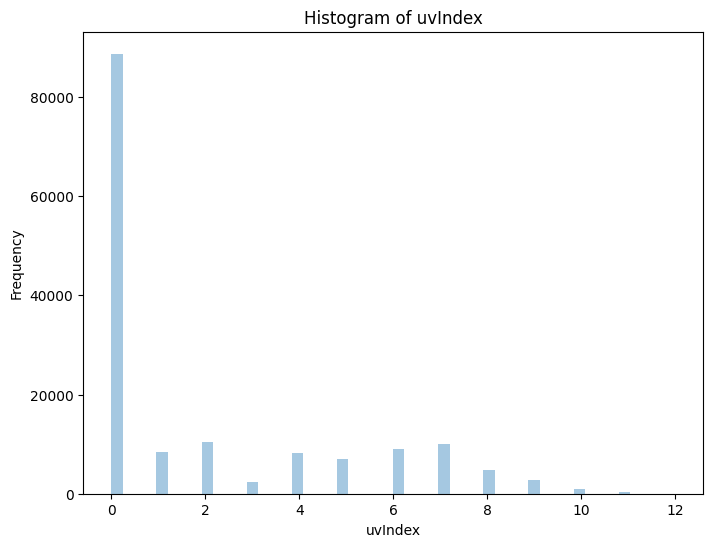

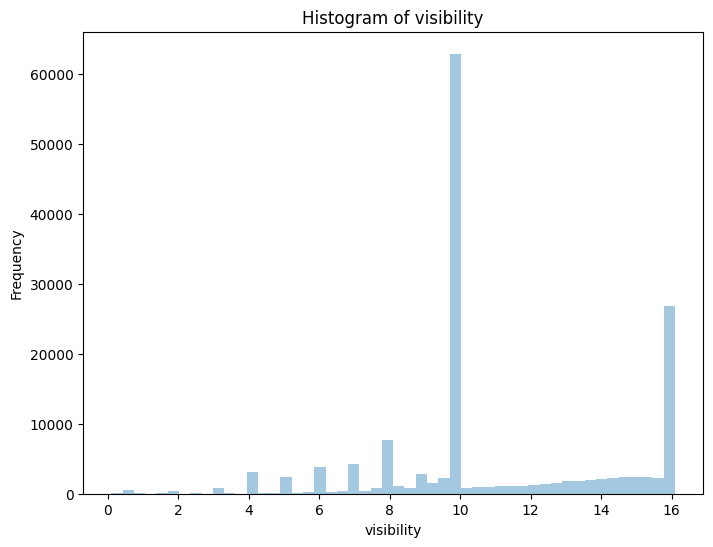

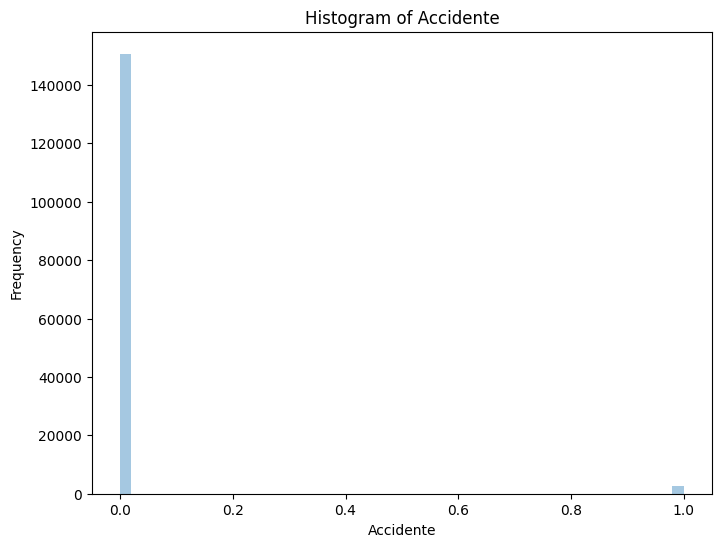

In [ ]:
# Se realiza un avisualización de los datos de las variables numéricas por medio de histogramas
numeric_columns= train_df.select_dtypes(include=['float64','int64'])
for column in numeric_columns.columns:
  plt.figure(figsize=(8,6))
  sns.distplot(train_df[column], kde=False)
  plt.title(f'Histogram of {column}')
  plt.xlabel(column)
  plt.ylabel('Frequency')
  plt.show()

In [ ]:
# Para la visualización de datos de las avriables categóricas se realiza un conteo de los valores en cada una de las variables
categorical_columns = train_df.select_dtypes(include=['object'])
for column in categorical_columns.columns:
  print(train_df[column].value_counts())

2018-12-18 07:00:00    22
2018-09-20 20:00:00    22
2018-03-17 19:00:00    22
2018-04-15 18:00:00    22
2018-05-23 22:00:00    22
                       ..
2018-06-01 14:00:00    11
2018-06-11 03:00:00    11
2018-06-07 13:00:00    10
2018-05-02 01:00:00    10
2018-08-12 01:00:00    10
Name: TW, Length: 8716, dtype: int64
castropol                 7022
elpoblado                 7021
barriocolombia            7017
sanlucas                  7011
eldiamanteno2             7001
eltesoro                  6989
villacarlota              6986
elcastillo                6982
losbalsosno1              6980
laslomasno2               6979
patiobonito               6972
astorga                   6969
lalinde                   6968
laaguacatala              6961
losbalsosno2              6957
alejandria                6952
laslomasno1               6952
manila                    6949
santamariadelosangeles    6947
losnaranjos               6945
laflorida                 6938
altosdelpoblado           

<ipython-input-12-9fe35a25016b>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = train_df.corr()


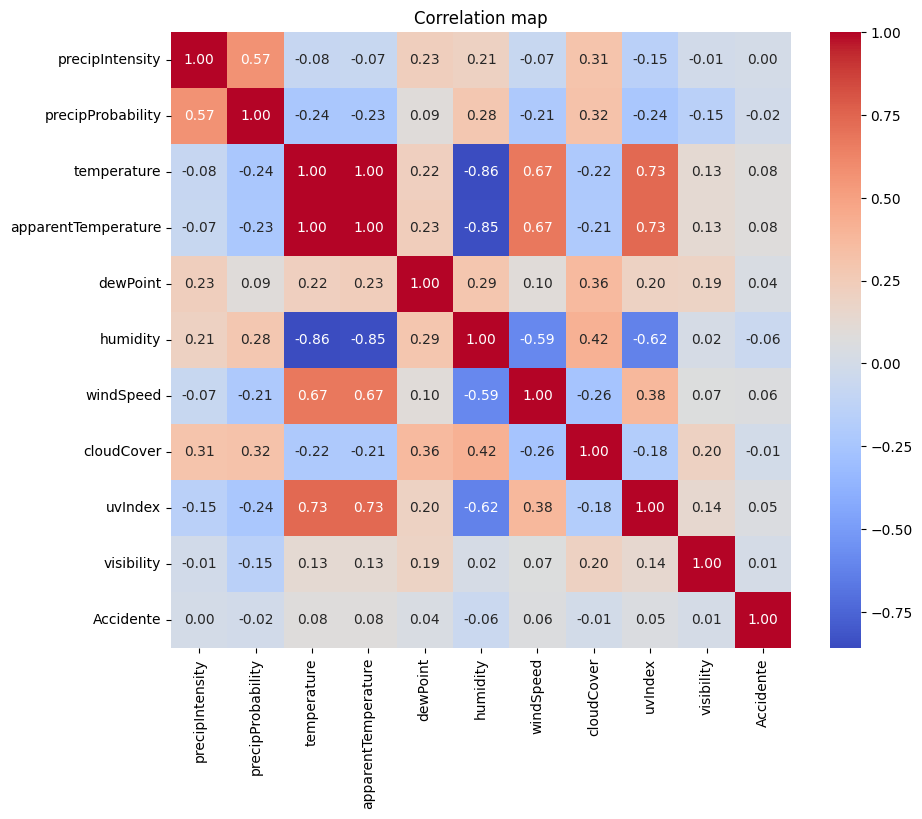

In [ ]:
#Por ultimo se realiza un análisis de correlación entre las variables
correlation_matrix = train_df.corr()

plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation map')
plt.show()

#### Manejo de datos faltantes

In [ ]:
#Ya que 4 variables muestran mas del 20% de datos faltantes se decide completar estos espacios con simpleimputer de sklearn, utilizando la media; ya que los histpgramas muestran una relación
# similar a la campana de gauss
imputer = SimpleImputer(strategy='mean')
train_df[numeric_columns.columns] = imputer.fit_transform(train_df[numeric_columns.columns])

In [ ]:
#Se comprueba que no haya valores faltantes
missing_values_train = train_df.isnull().sum()
missing_percentage_train =(missing_values_train / len(train_df))*100
pd.concat([missing_values_train,missing_percentage_train], axis=1, keys =['Missing Values', 'Percentage'])

,Missing Values,Percentage
TW,0,0.0
BARRIO,0,0.0
summary,0,0.0
icon,0,0.0
precipIntensity,0,0.0
precipProbability,0,0.0
temperature,0,0.0
apparentTemperature,0,0.0
dewPoint,0,0.0
humidity,0,0.0


In [ ]:
# Debido a que las variables categoricas poseen varios valores distintos y al utilizar tecnicas como one hot code se obtienen mas de 80.000 variables
# se decide eliminarlas
train_df = train_df.drop(categorical_columns.columns, axis=1)
test_df = test_df.drop(categorical_columns.columns, axis=1)

#### Prueba con varios modelos

In [ ]:
#Se dividen los conjutos de train y test en los cuatro conjutos principales necesarios para el modelo
x_train= train_df.drop('Accidente', axis=1)
y_train= train_df['Accidente']

x_test= test_df.drop('Accidente', axis=1)
y_test= test_df['Accidente']

In [ ]:
# Se prueban 4 modelos para predecir la avriable Accidente LogisticRegression, SVC, GradientBoostingClassifier y RandomForestClassifier
classifiers = [
               LogisticRegression(),
               SVC(),
               GradientBoostingClassifier()]

for clf in classifiers:
  clf.fit(x_train, y_train)
  y_pred =clf.predict(x_test)
  accuracy = accuracy_score(y_test, y_pred)
  print(f'{clf.__class__.__name__} -Accuracy: {accuracy}')

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression -Accuracy: 0.9823566064342636
SVC -Accuracy: 0.9823566064342636
GradientBoostingClassifier -Accuracy: 0.9822254287869348


In [ ]:
#El accuracy mas alto de los modelos es LogisticRegression por lo que se decide escoger este modleo como el final.
rf_classifier = RandomForestClassifier()
rf_classifier.fit(x_train, y_train)
y_pred_rf = rf_classifier.predict(x_test)
accuracy_rf =accuracy_score (y_test, y_pred_rf)
print(f'RandomForestClassifier - Accuracy: {accuracy_rf}')

RandomForestClassifier - Accuracy: 0.9810448299609746
